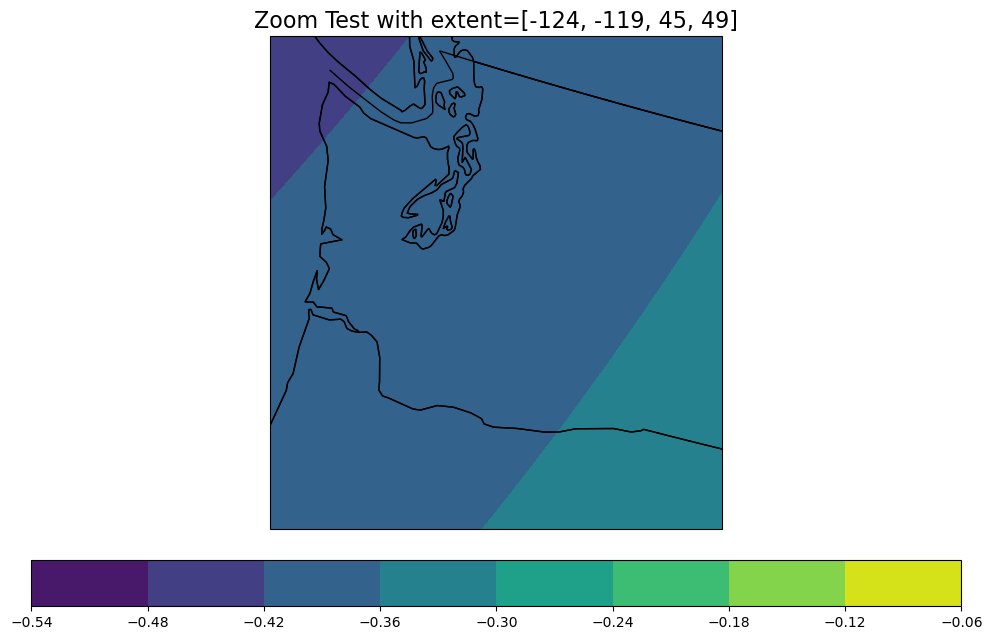

In [5]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Dummy lat/lon data
lons = np.linspace(-130, -100, 100)
lats = np.linspace(30, 55, 100)
lon2d, lat2d = np.meshgrid(lons, lats)

# Dummy data to plot
data = np.sin(np.deg2rad(lat2d)) * np.cos(np.deg2rad(lon2d))

# Try different extents here
# Format: [west_lon, east_lon, south_lat, north_lat]
extent = [-124, -119, 45, 49]  # <-- change this to test zoom

# Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertConformal())
ax.set_extent(extent, crs=ccrs.PlateCarree())

# Map features
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'))

# Plot the dummy data
cs = ax.contourf(lon2d, lat2d, data, transform=ccrs.PlateCarree(), cmap='viridis')

# Add colorbar
plt.colorbar(cs, orientation='horizontal', pad=0.05)

# Title
ax.set_title(f"Zoom Test with extent={extent}", fontsize=16)

plt.show()


In [1]:
import gzip
import os
import io
import xarray as xr
import os
import numpy as np
import metpy
import metpy.calc as mpcalc
from metpy.units import units
from datetime import datetime
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import glob
import pandas as pd
from PIL import Image
from olr_to_tb import *
import math
import wrf
from netCDF4 import Dataset
import fsspec
import zarr
from wrf import getvar
import gc

In [2]:
# start here if file already 
src_dir = r"C:\Users\miles\Downloads\mcs_data\unzipped"
ds = xr.open_zarr(src_dir + '/processed_data.zarr', chunks='auto')


c:\Users\miles\miniconda3\envs\mcs\lib\site-packages\xarray\conventions.py:289: SerializationWarning: variable 'dbz' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
c:\Users\miles\miniconda3\envs\mcs\lib\site-packages\xarray\conventions.py:289: SerializationWarning: variable 'pvo' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
c:\Users\miles\miniconda3\envs\mcs\lib\site-packages\xarray\conventions.py:289: SerializationWarning: variable 'td2' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
c:\Users\miles\miniconda3\envs\mcs\lib\site-packages\xarray\conventions.py:289: SerializationWarning: variable 'temp' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


In [3]:
ds

<xarray.Dataset> Size: 67GB
Dimensions:                (Time: 25, south_north: 663, west_east: 924,
                            bottom_top_stag: 38, bottom_top: 37,
                            soil_layers_stag: 4, seed_dim_stag: 2,
                            west_east_stag: 925, south_north_stag: 664)
Coordinates:
  * Time                   (Time) datetime64[ns] 200B 2024-08-17T12:00:00 ......
    XLAT                   (Time, south_north, west_east) float32 61MB dask.array<chunksize=(1, 663, 924), meta=np.ndarray>
    XLAT_U                 (Time, south_north, west_east_stag) float32 61MB dask.array<chunksize=(1, 663, 925), meta=np.ndarray>
    XLAT_V                 (Time, south_north_stag, west_east) float32 61MB dask.array<chunksize=(1, 664, 924), meta=np.ndarray>
    XLONG                  (Time, south_north, west_east) float32 61MB dask.array<chunksize=(1, 663, 924), meta=np.ndarray>
    XLONG_U                (Time, south_north, west_east_stag) float32 61MB dask.array<chunksize=(1, 663, 925), meta=np.ndarray>
    XLONG_V                (Time, south_north_stag, west_east) float32 61MB dask.array<chunksize=(1, 664, 924), meta=np.ndarray>
    XTIME                  (Time) datetime64[ns] 200B dask.array<chunksize=(1,), meta=np.ndarray>
    level                  int32 4B ...
    mcape_mcin_lcl_lfc     <U5 20B ...
    u_v                    <U1 4B ...
Dimensions without coordinates: south_north, west_east, bottom_top_stag,
                                bottom_top, soil_layers_stag, seed_dim_stag,
                                west_east_stag, south_north_stag
Data variables: (12/173)
    ACSNOM                 (Time, south_north, west_east) float32 61MB dask.array<chunksize=(1, 663, 924), meta=np.ndarray>
    ACSNOW                 (Time, south_north, west_east) float32 61MB dask.array<chunksize=(1, 663, 924), meta=np.ndarray>
    ALBEDO                 (Time, south_north, west_east) float32 61MB dask.array<chunksize=(1, 663, 924), meta=np.ndarray>
    C1F                    (Time, bottom_top_stag) float32 4kB dask.array<chunksize=(1, 38), meta=np.ndarray>
    C1H                    (Time, bottom_top) float32 4kB dask.array<chunksize=(1, 37), meta=np.ndarray>
    C2F                    (Time, bottom_top_stag) float32 4kB dask.array<chunksize=(1, 38), meta=np.ndarray>
    ...                     ...
    theta                  (Time, bottom_top, south_north, west_east) float32 2GB dask.array<chunksize=(1, 37, 663, 924), meta=np.ndarray>
    u_met                  (Time, bottom_top, south_north, west_east) float32 2GB dask.array<chunksize=(4, 5, 166, 231), meta=np.ndarray>
    u_met10                (Time, south_north, west_east) float32 61MB dask.array<chunksize=(7, 166, 231), meta=np.ndarray>
    updraft_helicity       (Time, south_north, west_east) float32 61MB dask.array<chunksize=(7, 166, 231), meta=np.ndarray>
    v_met                  (Time, bottom_top, south_north, west_east) float32 2GB dask.array<chunksize=(4, 5, 166, 231), meta=np.ndarray>
    v_met10                (Time, south_north, west_east) float32 61MB dask.array<chunksize=(7, 166, 231), meta=np.ndarray>
Attributes:
    GRIDTYPE:                        C
    MAP_PROJ_CHAR:                   Lambert Conformal
    MMINLU:                          MODIFIED_IGBP_MODIS_NOAH
    SIMULATION_INITIALIZATION_TYPE:  REAL-DATA CASE
    SIMULATION_START_DATE:           2024-08-17_00:00:00
    START_DATE:                      2024-08-17_00:00:00
    TITLE:                            OUTPUT FROM WRF V4.1.3 MODEL